# Udacity-DAND-P1-Project-Report


>__背景信息__<br>
>在一个 Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

## 数据分析报告

- **自变量／Independent variable**  
文字与颜色是否一致<br><br>

- **因变量／Dependent variable**  
参与者说出所有文字颜色所花费时间<br><br>

- **处理方式／Treatment**  
改变文字和其颜色的一致性<br><br>

- **统计测试类型／Statistical test to perform**  
由于该试验为**相依测试**（Dependent test）中的**Repeated measures design**，且测试结果数据集样本数较小$(n<30)$，所以应使用__t检验__。

- **假设集／Set of hypothesis**  
<span style="color:blue;">$\mu_{c}$</span>: 文字与颜色<span style="color:blue;">一致</span>情况下所花费时间的总体均值<br>
<span style="color:blue;">$\mu_{i}$</span>: 文字与颜色<span style="color:blue;">不一致</span>情况下所花费时间的总体均值<br><br>
假设：<br>
$H_{0}: \mu_{i}=\mu_{c}$   ：在两种测试条件下被测者的花费时间不会有变化<br>
$H_{A}: \mu_{i}>\mu_{c}$   ：在文字和颜色不一致的条件下被测者的花费时间会增加<br><br>

- **测试类型／Type of test**  
单尾正向 ／ one-tailed in positive direction 

- **数据集统计**   
![统计](dataset.jpg)

- **数据可视化-Box Plot **

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
stroop = np.genfromtxt('stroopdata.csv',
                       delimiter=',',
                       dtype=np.float32)

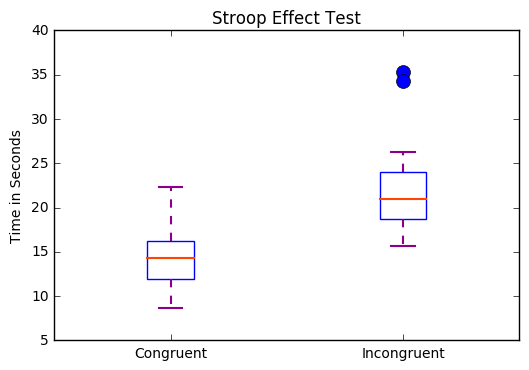

In [6]:
plt.figure()
plot1 = plt.boxplot(stroop, 
                    widths = 0.2,
                    notch = False,             # median notch
                    positions = [1,2],    # boxes locations
                    patch_artist=True,
                    )

plt.setp(plot1['whiskers'], color='DarkMagenta', linewidth=1.5)
plt.setp(plot1['caps'], color='DarkMagenta', linewidth=1.5)
plt.setp(plot1['fliers'], color='OrangeRed', marker='o', markersize=10)
plt.setp(plot1['medians'], color='OrangeRed', linewidth=1.5)

plt.xticks([1,2],               # tick marks
           ['Congruent', 'Incongruent'],                   # labels
           rotation='horizontal')     # rotate the labels

plt.ylabel('Time in Seconds')                  # y-axis label
plt.title('Stroop Effect Test')  # plot title
                    
plt.show()                          # render the plot

从上面的箱型图中可以看出，文字和颜色不一致的实验中被测者所花费的时间总体比文字和颜色一致的实验要多。

- **统计检验**   
$n=24$  
$df=23$   
$\alpha=.05$   
$t_{critical}=1.714$   
$\bar{x}_{c}=14.05$     $\bar{x}_{i}=22.02$   
$\mu_{i}-\mu_{c}$的点估计为$\bar{x}_{i}-\bar{x}_{c} =  M_{D} = 7.97$   
$S_{D}=4.86$   (两种条件下时间差异的标准偏差)   
$SEM = \frac{S_{D}}{\sqrt{n}} = 0.99$   
$t=\frac{\mu_{i} - \mu_{c}}{SEM} = 8.02$   
Cohen's d $= \frac{M_{D}}{S_{D}} = 1.64$   
$r^2 = \frac{r^2}{r^2 + df} = 0.74$   表明对这24个被测人员样本来讲，造成前后测试结果的时间差异中有74%是由于文字和颜色不一致造成的。   
Margin of error for 95% CI $= 2.069 * SEM = 2.05 $   
95%CI: $M_{D} \pm$ (Margin of error)$ = 7.97 \pm 2.05 = (5.92, 10.02)$   
P-Value $= .0001 < .05$

<br><br>

---

## 结论
**<span style="color:red">拒绝零假设，表明在文字和颜色不同的条件下，被测者需要更多的时间才能完全喊出文字颜色。</span>**   
$t(23) = 8.02, p=.0001, one-tailed$   
$95\% CI = (5.92,10.02)$   如果对整个人口群体做一个类似两种测试的话，前后耗时差异最有可能落在5.92秒到10.02秒之间。   
Cohen's d$ = 1.64$   
$r^2 = .74$  表明对这24个被测人员样本来讲，造成前后测试结果的时间差异中有74%是由于文字和颜色不一致造成的。

---
## Stroop现象的原因探究
目前对于Stroop现象产生的原因的解释主要有以下四种理论 [注1]：
1. **处理速度理论**：该理论认为大脑处理文字比识别颜色的速度要快，因此在大脑需要作出决定时，文字信息先于色彩信息到达决策阶段造成了大脑作出决定时的干扰。
2. **选择性注意**： 该理论认为因为相对于阅读文字，识别颜色需要占用大脑更多的注意力，所以需要更多的处理时间。
3. **自动化理论**： 该理论认为大脑阅读文字是一种下意识的大脑反应，而识别颜色不是。因此识别颜色时大脑需要控制注意力来进行处理。
4. **平行分布式处理理论**： 大脑分析信息时，不同类型任务采用不同的特定路径。类似阅读的处理路径的力度更大，因此会对识别颜色的处理产生干扰。

>注1: [Stroop effect - Wikipedia](https://en.wikipedia.org/wiki/Stroop_effect#Theories) 

## Stroop测试变种 [注2]
1. 将文字旋转90度或者180度
2. 用没有意义的单词替代颜色名称
>注2: [Stroop effect](https://faculty.washington.edu/chudler/words.html)